# A Simple Pendulum

## Derivation of Motion Equations

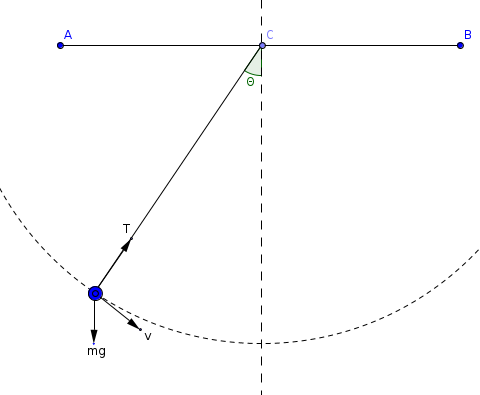

$ s = l \theta$ <br>
As per the above diagram, <br>
$ a = -\ddot{s} = -l \ddot{\theta}$ <br>
Justification of the "-" sign: <br>
$$ v = \frac{s(t_2) - s(t_1)}{t_2 - t_1} $$ <br>
As per diagram, $s(t_2) < s(t_1)$. Therefore <br>
$ v = -\dot{s} $ <br>
$ a = -\ddot{s} $ <br><br>

Applying Newton's Second law in the tangential direction - <br>
$ mg \sin\theta = -m l \ddot{\theta}$ <br>
$$ \ddot{\theta} + \frac{g}{l} \sin{\theta} = 0$$ <br><br>

Assuming $\theta << 1$, <br>
$$ \ddot{\theta} + \frac{g}{l}\theta = 0$$ <br><br>

The solution of the above equation - <br>
$$ \theta = \theta_o \cos(\sqrt{\frac{g}{l}} t)$$

In [2]:
%matplotlib inline

import math
import numpy as np
from scipy.integrate import odeint

from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [3]:
def deg2rad(theta):
    return theta*math.pi/180

In [4]:
l = 1 # m
m = 1 # kg
g = 9.81 # m/s**2
theta_o = 30 # degrees

## co-ordinates for plot
C = (0, 0)
x = l*math.sin(deg2rad(theta_o))
y = -l*math.cos(deg2rad(theta_o))
print(x, y)

0.49999999999999994 -0.8660254037844387


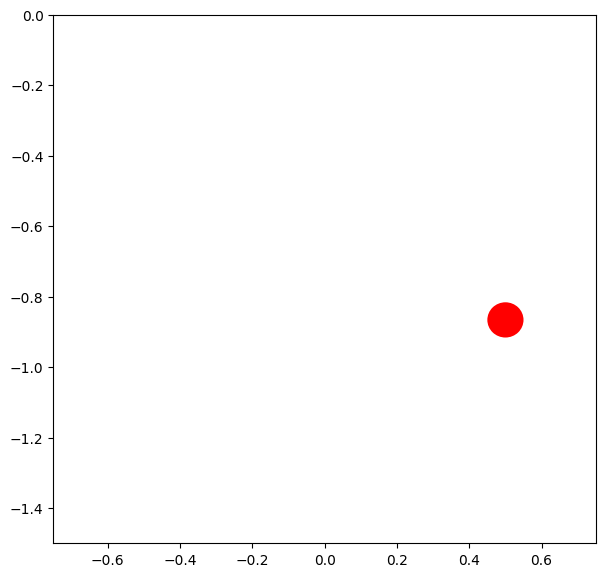

In [7]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)

ax = plt.axes(xlim=(-0.75, 0.75), ylim=(-1.5, 0))
patch = plt.Circle((x, y), 0.05, fc='r')
line, = ax.plot([], [], 'b')
curve, = ax.plot([], [], 'k')

curve_x = []
curve_y = []

def curve_cord(x, y):
    curve_x.append(x)
    curve_y.append(y)
    #print(len(curve_x))
    return curve_x, curve_y

def init():
    patch.center = (x, y)
    ax.add_patch(patch)
    line.set_data([], [])
    curve.set_data([], [])
    return patch, line, curve,

def animate(t):
    theta = deg2rad(theta_o)*math.cos((g/l)**0.5*t/10)
    x = l*math.sin(theta)
    y = -l*math.cos(theta)
    patch.center = (x, y)
    line.set_data([0, x], [0, y])
    curve.set_data(*curve_cord(x, y))
    return patch, line, curve,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init,
                               frames=100,
                               interval=500,
                               blit=True)

In [6]:
HTML(anim.to_html5_video())

### Simulation Based on Numerical Solution of Differential Equation

In [53]:
l = 1 # m
m = 1 # kg
g = 9.81 # m/s**2
theta_o = 30 # degrees
theta_dot_o = 0 # rad/s

## co-ordinates for plot
C = (0, 0)
x = l*math.sin(deg2rad(theta_o))
y = -l*math.cos(deg2rad(theta_o))

In [65]:
def dU_dt(U, t):
    # U[0] = theta, U[1] = z
    return [U[1], -g/l*U[0]]

U0 = [deg2rad(theta_o), theta_dot_o]

t = np.linspace(0, 10, 500)
sys_var = odeint(dU_dt, U0, t)
theta_s = sys_var[:,0]

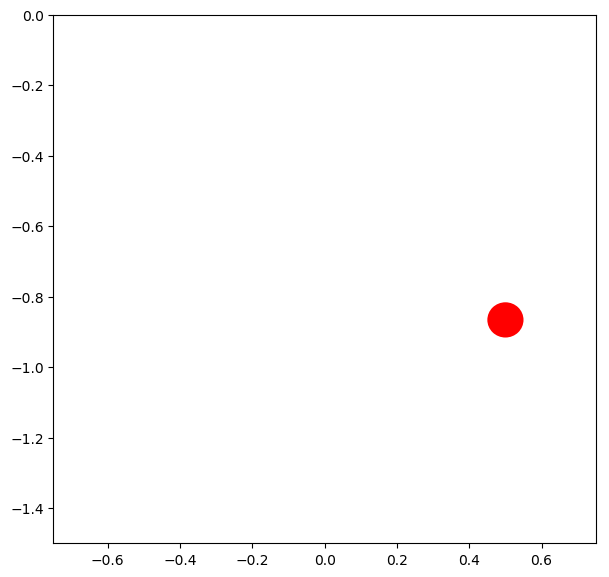

In [66]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)

ax = plt.axes(xlim=(-0.75, 0.75), ylim=(-1.5, 0))
patch = plt.Circle((x, y), 0.05, fc='r')
line, = ax.plot([], [], 'b')
curve, = ax.plot([], [], 'k')

curve_x = []
curve_y = []


def curve_cord(x, y):
    curve_x.append(x)
    curve_y.append(y)
    #print(len(curve_x))
    return curve_x, curve_y

def init():
    patch.center = (x, y)
    ax.add_patch(patch)
    line.set_data([], [])
    curve.set_data([], [])
    return patch, line, curve,


def animate(t):
    theta = theta_s[t]
    x = l*math.sin(theta)
    y = -l*math.cos(theta)
    patch.center = (x, y)
    line.set_data([0, x], [0, y])
    curve.set_data(*curve_cord(x, y))
    return patch, line, curve,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init,
                               frames=100,
                               interval=300,
                               blit=True)

In [67]:
HTML(anim.to_html5_video())